<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/>
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:green"><center> Kaggle Dogs vs Cats</center></span>

**<center>Convoluciones</center>**

<figure>
<center>
<img src="../Imagenes/Convolution_arithmetic.gif" width="400" height="400" align="center"/>
</center>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Convolution_arithmetic_-_Dilation.gif">Vincent Dumoulin, Francesco Visin</a>, <a href="http://opensource.org/licenses/mit-license.php">MIT</a>, via Wikimedia Commons

## <span style="color:#4361EE">Profesores</span>

* Alvaro  Montenegro, PhD, <ammontenegrod@unal.edu.co>
* Campo Elías Pardo, PhD, <cepardot@unal.edu.co>
* Daniel  Montenegro, Msc, <dextronomo@gmail.com>
* Camilo José Torres Jiménez, Msc, <cjtorresj@unal.edu.co>

##   <span style="color:#4361EE">Estudiantes auxiliares</span>

* Jessica López, jelopezme@unal.edu.co
* Camilo Chitivo, cchitivo@unal.edu.co
* Daniel Rojas, anrojasor@unal.edu.co

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

* Maria del Pilar Montenegro, pmontenegro88@gmail.com
* Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

* Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

* David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

* Dairo Moreno, damoralesj@unal.edu.co
* Joan Castro, jocastroc@unal.edu.co
* Bryan Riveros, briveros@unal.edu.co
* Rosmer Vargas, rovargasc@unal.edu.co
* Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

* Giovvani Barrera, udgiovanni@gmail.com
* Camilo Chitivo, cchitivo@unal.edu.co

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take time to download
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-09-21 23:05:54--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.73.13.109, 2600:1413:1:595::317f, 2600:1413:1:5a0::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.73.13.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   141MB/s    in 7.4s    

2023-09-21 23:06:02 (106 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [4]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
# Expected Output:
# 12501
# 12501

12501
12501


In [5]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

## Uso de la función para este dataset en particular
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)
# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))
# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [10]:
# Note that this may take some time.
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
129/225 [================>.............] - ETA: 1:09 - loss: 0.6905 - accuracy: 0.5633

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 [==============================] - 206s 860ms/step - loss: 0.6674 - accuracy: 0.5966 - val_loss: 0.5956 - val_accuracy: 0.6792
Epoch 2/15
225/225 [==============================] - 185s 824ms/step - loss: 0.6005 - accuracy: 0.6713 - val_loss: 0.5900 - val_accuracy: 0.6740
Epoch 3/15
225/225 [==============================] - 180s 800ms/step - loss: 0.5762 - accuracy: 0.6930 - val_loss: 0.5795 - val_accuracy: 0.6932
Epoch 4/15
225/225 [==============================] - 172s 765ms/step - loss: 0.5530 - accuracy: 0.7130 - val_loss: 0.5356 - val_accuracy: 0.7268
Epoch 5/15
225/225 [==============================] - 177s 785ms/step - loss: 0.5380 - accuracy: 0.7251 - val_loss: 0.4990 - val_accuracy: 0.7596
Epoch 6/15
225/225 [==============================] - 173s 769ms/step - loss: 0.5225 - accuracy: 0.7333 - val_loss: 0.5087 - val_accuracy: 0.7556
Epoch 7/15
225/225 [==============================] - 172s 766ms/step - loss: 0.5076 - accuracy: 0.7502 - val_loss: 0.4823 - val_accura

In [11]:
tf.keras.models.save_model(model, 'Cats_v_Dogs_Kaggle.keras')

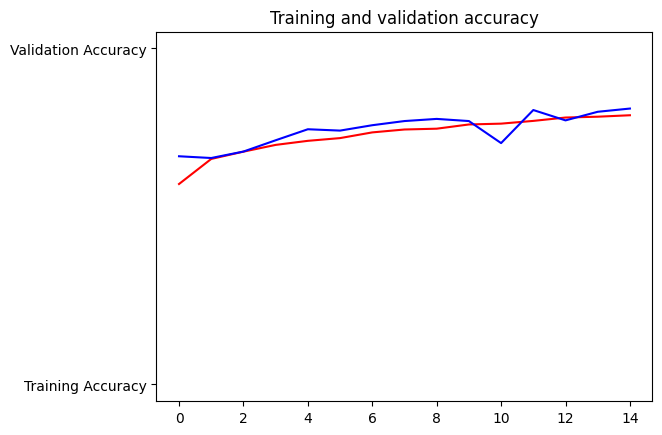

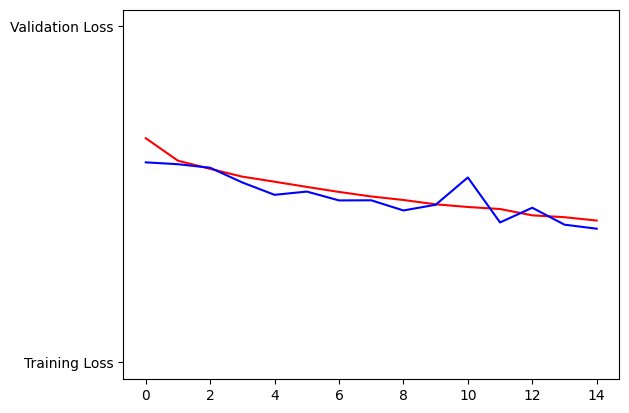

In [12]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

In [13]:
model=tf.keras.models.load_model('Cats_v_Dogs_Kaggle.keras')

Saving Luna_150x200.jpg to Luna_150x200.jpg


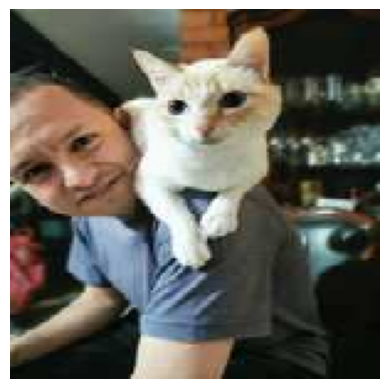

1/1 [==============================] - 0s 205ms/step
[1.]
Luna_150x200.jpg is a cat


In [14]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))

  # Mostrar la imagen utilizando Matplotlib
  plt.imshow(img)
  plt.axis('off')  # Para ocultar los ejes
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a cat")
  else:
    print(fn + " is a dog")